In [147]:
import tensorflow as tf;
import matplotlib.pyplot as plt
import random
import numpy as np

### Load Dataset - cifar10

In [148]:
cifar10 = tf.keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
class_names = ['NOT vehicle', 'vehicle']

# Change data set to only have 2 labels
for i in range(50000):
    if train_labels[i][0] not in {1, 9}:
        train_labels[i][0] = 0
    else:
        train_labels[i][0] = 1
        
for i in range(10000):
    if test_labels[i][0] not in {1, 9}:
        test_labels[i][0] = 0
    else:
        test_labels[i][0] = 1

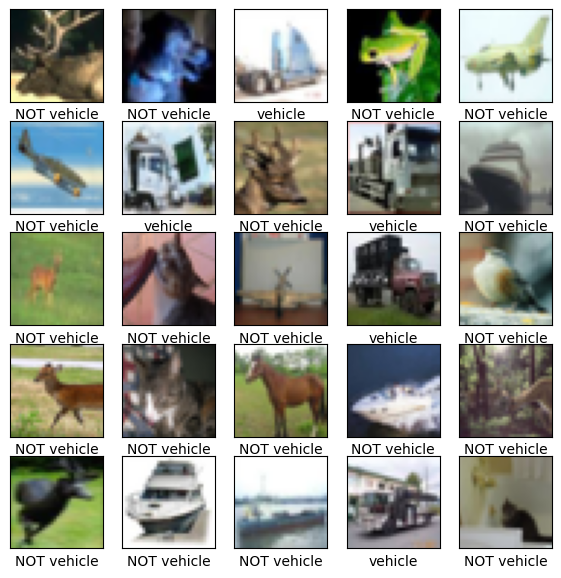

In [149]:
plt.figure(figsize=(7,7))
for i in range(25):
    random_image = random.randint(1,10000)
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[random_image])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[random_image][0]])
plt.show()

In [150]:
# Normalize pixel values
train_images, test_images = train_images / 255.0, test_images / 255.0

# Preprocessing: Flatten the images
train_images = train_images.reshape(train_images.shape[0], -1)
test_images = test_images.reshape(test_images.shape[0], -1)

# Flatten the labels
train_labels = train_labels.ravel()
test_labels = test_labels.ravel()

# Create a subset for development to avoid long training time
subset_size = 10000

# Randomly select indices for the subset
subset_indices = np.random.choice(len(train_images), subset_size, replace=False)

# Create the subset
sub_train_images = train_images[subset_indices]
sub_train_labels = train_labels[subset_indices]

Make Random Forest Model

In [151]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming you have your features (X) and labels (y) ready

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(sub_train_images, sub_train_labels, test_size=0.2, random_state=42)

# Define the Random Forest classifier
rnd_clf = RandomForestClassifier(n_estimators=200, random_state=42)

# Train the classifier
rnd_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rnd_clf.predict(X_test)

Subset = 10000 <br>
n_estimators = 100, random_state = 42: 
<br>Accuracy 0.8541 Time: 1m 18.2s<br>
n_estimators = 200, random_state = 42:
<br>Accuracy 0.856 Time: 2m 24.5s<br>
n_estimators = 300, random_state = 42:
<br>Accuracy 0.8553 Time: 3m 37.2s<br>
n_estimators = 400, random_state = 42:
<br>Accuracy 0.8551 Time: 8m 53.7s<br>
n_estimators=200, random_state=42, max_depth=10, min_samples_leaf=2, max_features='log2'
<br>Accuracy 0.8463 <br>
n_estimators=200, random_state=42, max_depth=10, min_samples_leaf=2, max_features='log2'
<br>Accuracy 0.8383 Time: 16.2s <br>

In [155]:
# Predict the labels for test set
pred_label = rnd_clf.predict(test_images)

# Evaluate the model
accuracy = accuracy_score(test_labels, pred_label)

print("Accuracy:", accuracy)

Accuracy: 0.8601


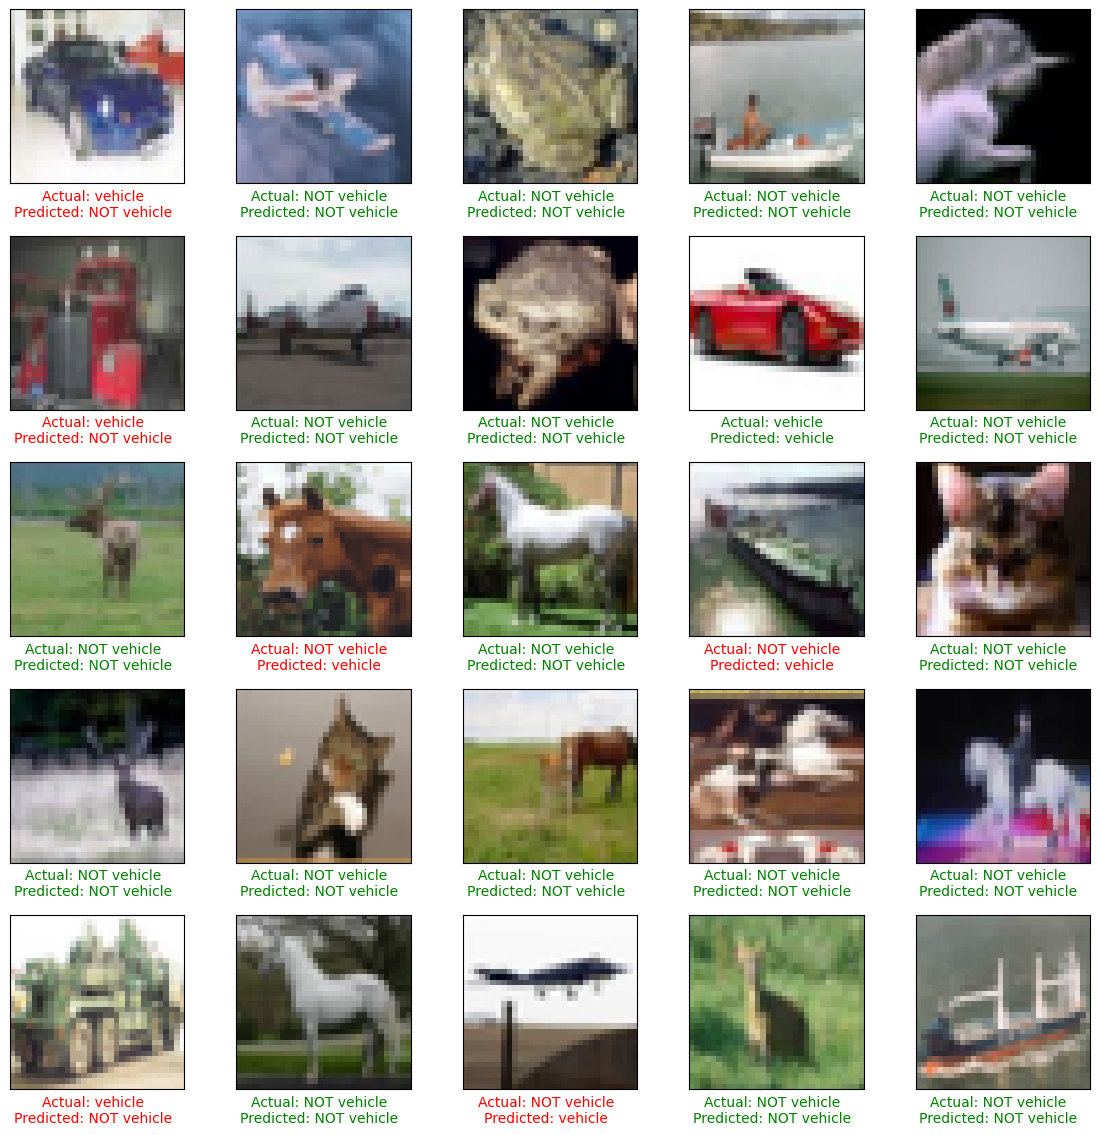

In [157]:
plt.figure(figsize=(12, 12))
for i in range(25):
    random_image = random.randint(1, 10000)
    
    # Plot the image
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[random_image].reshape(32, 32, 3))
    
    # Get the correct and predicted labels
    correct_label = class_names[test_labels[random_image]]
    predicted_label = class_names[pred_label[random_image]]
    
    # Determine label color based on correctness
    label_color = 'green' if correct_label == predicted_label else 'red'
    
    # Display labels with a space after each label
    plt.xlabel(f'Actual: {correct_label}  \nPredicted: {predicted_label}  ', color=label_color)

# Adjust spacing between subplots
plt.subplots_adjust(left=0.05, bottom=0.05, right=0.95, top=0.95, wspace=0.3, hspace=0.3)

plt.show()

In [164]:
import pickle
images = open("output.pkl", "rb")

dev_images = pickle.load(images)

images.close()

# Normalize pixel values
dev_images = dev_images / 255.0

# Preprocessing: Flatten the images
dev_images = dev_images.reshape(dev_images.shape[0], -1)

In [165]:
dev_pred_label = rnd_clf.predict(dev_images)

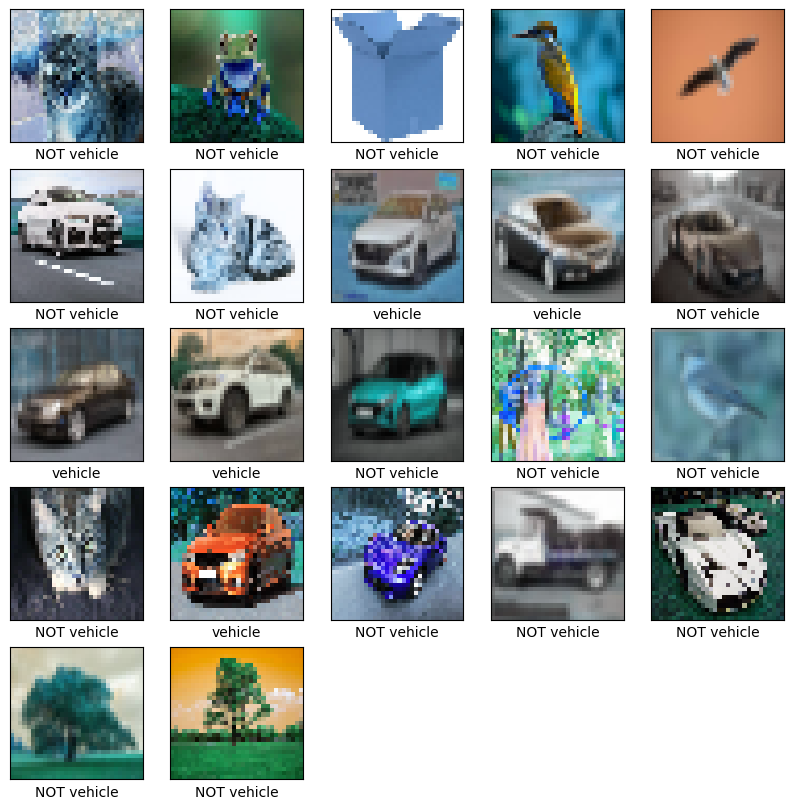

In [168]:
plt.figure(figsize=(10,10))
for i in range(22):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(dev_images[i].reshape(32, 32, 3))  # Reshape images to (32, 32, 3)
    plt.xlabel(class_names[int(dev_pred_label[i])])  # Use predicted labels
plt.show()